# Обучение сиамской сети для различия двух объектов

Обучение на данных MOT20Ext

In [17]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from torch import Generator
from torch.utils.data import ConcatDataset, DataLoader, random_split
from tqdm import tqdm
from src.config import MOT20_EXT_FIRST_AXIS_MEAN, MOT20_EXT_SECOND_AXIS_MEAN, IMAGENET_MEAN, IMAGENET_STD
from src.data import MOT20ExtDataset
from src.train import display_images, get_statistics, display_batch
from src.transforms import get_norm_transform, get_resize_transform

## Загрузка данных

In [2]:
resize_transform = get_resize_transform((MOT20_EXT_FIRST_AXIS_MEAN, MOT20_EXT_SECOND_AXIS_MEAN)) 
norm_transform = get_norm_transform()
transform = A.Compose([resize_transform, norm_transform])

In [3]:
dataset01 = MOT20ExtDataset('data/MOT20_ext/train/MOT20-01/', transform=transform)
dataset02 = MOT20ExtDataset('data/MOT20_ext/train/MOT20-02/', transform=transform)
dataset03 = MOT20ExtDataset('data/MOT20_ext/train/MOT20-03/', transform=transform)
dataset05 = MOT20ExtDataset('data/MOT20_ext/train/MOT20-05/', transform=transform)

In [4]:
dataset = ConcatDataset([dataset01, dataset02, dataset03, dataset05])

In [5]:
len(dataset)

271442

### Создание даталоадеров

In [6]:
TEST_PROPROTION = 0.2
VAL_PROPORTION = 0.15
TRAIN_PROPORTION = 1 - TEST_PROPROTION - VAL_PROPORTION
sum([TEST_PROPROTION, VAL_PROPORTION, TRAIN_PROPORTION])

1.0

In [7]:
generator = torch.manual_seed(0)

In [8]:
train_set, val_set, test_set = random_split(
    dataset, [TRAIN_PROPORTION, VAL_PROPORTION, TEST_PROPROTION], generator=generator)

In [9]:
BATCH_SIZE = 64

In [10]:
train_loader = DataLoader(
    train_set,
    shuffle=True,
    batch_size=BATCH_SIZE,
    drop_last=True,
    generator=generator,
    
)

val_loader = DataLoader(
    val_set,
    shuffle=True,
    batch_size=BATCH_SIZE,
    drop_last=True,
    generator=generator
)

test_loader = DataLoader(
    test_set,
    shuffle=True,
    batch_size=BATCH_SIZE,
    drop_last=True,
    generator=generator
)

In [11]:
len(train_loader), len(val_loader), len(test_loader)

(2756, 636, 848)

### Расчет статистик

In [12]:
loader = DataLoader(
    dataset,
    shuffle=True,
    batch_size=BATCH_SIZE,
    drop_last=True,
    generator=generator,
)

In [13]:
# get_statistics(loader)

### Проверка отображения

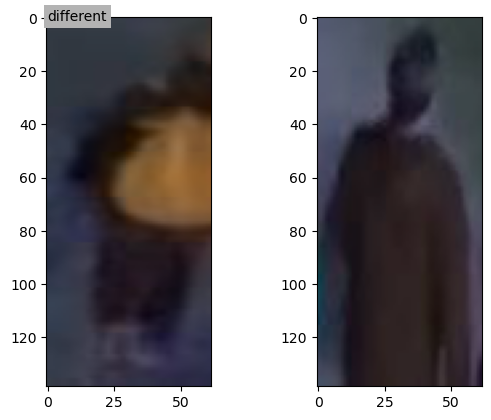

In [14]:
batch = next(iter(train_loader))
x1, x2, y = batch[0][0], batch[1][0], batch[2][0]
display_images((x1, x2), y)

64


7it [00:00, 333.81it/s]


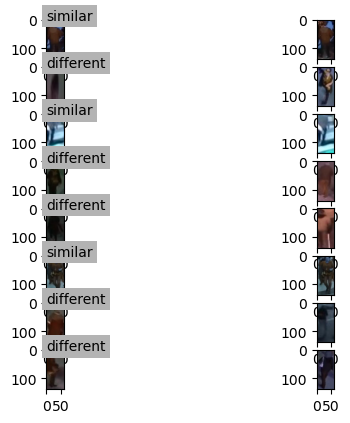

In [37]:
batch = next(iter(train_loader))
display_batch(batch)

## Обучение